In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def find_match(row):
    string = 'facebook.com'
    if string in row['http_hostname:131']:
        return row['http_hostname:131']
    elif string in row['fqdn:127']:
        return row['fqdn:127']
    elif string in row['c_tls_SNI:116']:
        return row['c_tls_SNI:116']
    else :
        return row['s_tls_SCN:117']
    
def find_match_regex(row):
    string = 'facebook'
    if string in row['http_hostname:131']:
        return row['http_hostname:131']
    elif string in row['fqdn:127']:
        return row['fqdn:127']
    elif string in row['c_tls_SNI:116']:
        return row['c_tls_SNI:116']
    else :
        return row['s_tls_SCN:117']

In [10]:
# Read file CSV
dataf = pd.read_csv('log_tcp_complete.xz', sep=' ', nrows=100000)

Compute the number of TCP connections whose client is “local” and are directed towards the services 
matching with “*facebook.com”, separated for each complete service name.
Then plot them as a barplot, ordered by decreasing number of TCP connections (if they are more than 20, plot the top-20).

The match should be done considering column 116, 117,127, and 131 as in the example 4. Report as complete service name, the string in column 127. If this does not match “*facebook.com”, report the string in column 131. If this  does not match “*facebook.com”, report the string in column 116. If this does not match “*facebook.com”, report the string in column 117.

Help: Create a new column called hostname where you report the complete service name, according to the 
rules above.

In [6]:
# Filter DataFrame for "/*facebook.com"
fb_string = '/*facebook.com'
fb_dataf = dataf[(dataf['c_isint:38'] == 1) &
                 (
                  (dataf['http_hostname:131'].str.contains(fb_string)) |
                  (dataf['fqdn:127'].str.contains(fb_string)) |
                  (dataf['c_tls_SNI:116'].str.contains(fb_string)) |
                  (dataf['s_tls_SCN:117'].str.contains(fb_string))
                 )
                ]
# print(fb_dataf)

In [7]:
new_col = fb_dataf.apply(find_match, axis=1)
# new_col
fb_dataf.insert(len(fb_dataf.columns),'hostname',new_col)
fb_dataf 
# CHIEDERE AL PROF DEL WARNING

,#15#c_ip:1,c_port:2,c_pkts_all:3,c_rst_cnt:4,c_ack_cnt:5,c_ack_cnt_p:6,c_bytes_uniq:7,c_pkts_data:8,c_bytes_all:9,c_pkts_retx:10,...,c_appdataT:123,s_appdataT:124,c_appdataB:125,s_appdataB:126,fqdn:127,dns_rslv:128,req_tm:129,res_tm:130,http_hostname:131,hostname2
16,67.32.97.6,61958,14,0,13,10,842,3,842,0,...,131.619,258.076,352,3738,graph.facebook.com,130.192.3.24,1.513070e+12,1.513070e+12,-,graph.facebook.com
28,67.32.97.6,61959,12,0,11,8,949,3,949,0,...,174.289,308.027,352,3738,graph.facebook.com,130.192.3.24,1.513070e+12,1.513070e+12,-,graph.facebook.com
467,67.32.230.6,53047,11,0,10,6,828,4,828,0,...,18.586,115.751,589,138,-,-,0.000000e+00,0.000000e+00,-,edge-mqtt.facebook.com
474,67.32.230.7,49936,9,0,8,5,710,3,710,0,...,94.467,237.905,325,3559,mqtt-mini.facebook.com,130.192.3.21,1.513070e+12,-1.000000e+03,-,mqtt-mini.facebook.com
493,67.32.230.29,42505,7,0,6,3,642,3,642,0,...,19.669,121.902,253,138,mqtt-mini.facebook.com,130.192.3.21,1.513070e+12,-1.000000e+03,-,mqtt-mini.facebook.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99695,67.32.230.19,35272,16,0,15,8,827,7,2438,3,...,1557.559,1675.399,589,138,mqtt.c10r.facebook.com,130.192.3.103,1.513071e+12,-1.000000e+03,-,mqtt.c10r.facebook.com
99777,67.32.230.26,38824,9,0,8,4,826,4,826,0,...,44.635,161.845,589,138,-,-,0.000000e+00,0.000000e+00,-,edge-mqtt.facebook.com
99795,67.32.181.212,52199,8,1,6,3,822,2,822,0,...,0.000,167.232,0,138,-,-,0.000000e+00,0.000000e+00,-,www.facebook.com
99916,67.32.230.31,56469,12,1,10,5,727,5,727,0,...,0.000,0.000,0,0,edge-mqtt.facebook.com,130.192.3.21,1.513071e+12,-1.000000e+03,-,edge-mqtt.facebook.com


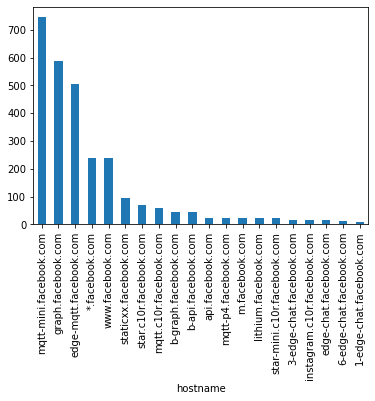

In [6]:
# Group and plot
fb_service = fb_dataf.groupby(['hostname']).size()
# fb_service
barplot = fb_service.sort_values(ascending=False).head(20).plot(kind='bar')

What happens if you match “*facebook*” instead of “*facebook.com”? Discuss the usefulness of the 
regex concept.

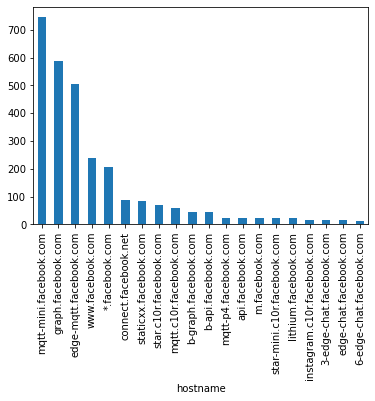

In [12]:
# Filter DataFrame for "/*facebook*"
fb_string_reg = '/*facebook*'
fb_dataf_reg = dataf[(dataf['c_isint:38'] == 1) &
                 (
                  (dataf['http_hostname:131'].str.contains(fb_string_reg)) |
                  (dataf['fqdn:127'].str.contains(fb_string_reg)) |
                  (dataf['c_tls_SNI:116'].str.contains(fb_string_reg)) |
                  (dataf['s_tls_SCN:117'].str.contains(fb_string_reg))
                 )
                ]
# print(fb_dataf)

new_col = fb_dataf_reg.apply(find_match_regex, axis=1)
# new_col
fb_dataf_reg.insert(len(fb_dataf_reg.columns),'hostname',new_col)
fb_dataf_reg 
# CHIEDERE AL PROF DEL WARNING

# Group and plot
fb_service_reg = fb_dataf_reg.groupby(['hostname']).size()
# fb_service
barplot_reg = fb_service_reg.sort_values(ascending=False).head(20).plot(kind='bar')

Possibile che non ci siano differenze senza il regex? In teoria la richiesta va a fb.it che poi contatta fb.com nel caso per settare la lingua no? Alcune differenze ci sono anche se non clamorose...non avevi cambiato la stringa in find_match

What are the top-15 most used services in general (without any filter on local client or service), in terms 
of TCP connections? Plot them as a barplot, ordered by decreasing number of TCP connections.


In [13]:
# 15 most used services in general
# Group and plot
# dataf = dataf.groupby(['http_hostname:131']).size()
# fb_service
# barplot = dataf.sort_values(ascending=False).head(15).plot(kind='bar')

# 15 most used TCP services in general
# Group and plot
def find_TCP(row):
    string = '-'
    if string not in row['http_hostname:131']:
        return row['http_hostname:131']
    elif string not in row['fqdn:127']:
        return row['fqdn:127']
    elif string not in row['c_tls_SNI:116']:
        return row['c_tls_SNI:116']
    elif string not in row['s_tls_SCN:117']:
        return row['s_tls_SCN:117']
    
top15 = pd.DataFrame()    
top15['tcp'] = dataf.apply(find_TCP, axis=1)
# top15

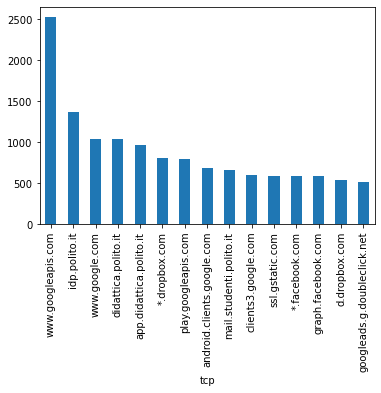

In [14]:
top15_all = top15.groupby(['tcp']).size()
barplot = top15_all.sort_values(ascending=False).head(15).plot(kind='bar')

2a) What happens if you repeat the exercise considering only HTTPS connections?

Dalla tabella nel file si legge solo che colonna 42=1 vuol dire HTTP ma non viene menzionato HTTPS -> dovrebbe essere TLS

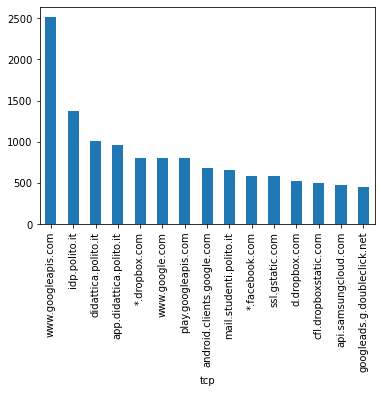

In [18]:
# # 15 most used services for HTTP connections
# # Group and plot
# dataf_HTTP = dataf[(dataf['con_t:42']==1)].groupby(['http_hostname:131']).size()
# # fb_service
# barplot = dataf_HTTP.sort_values(ascending=False).head(15).plot(kind='bar')

# 15 most used TCP services in general using HTTPS (TLS)
# Filter DataFrame for TLS
top15_tls = pd.DataFrame()
top15_tls['tcp'] = dataf[(dataf['con_t:42'] == 8192)].apply(find_TCP, axis=1)
# top15_https
top15_https = top15_tls.groupby(['tcp']).size()
barplot = top15_https.sort_values(ascending=False).head(15).plot(kind='bar')

Count the fraction of connections for different “connection type” (without any filter on local client or
service). Plot the results as a barplot.

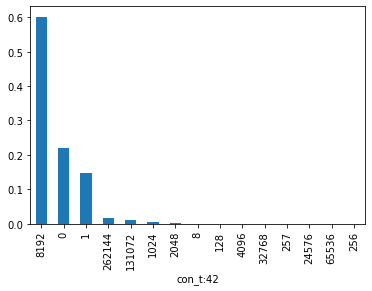

In [32]:
# Count the fraction of connections for different “connection type”
connections = dataf.groupby(['con_t:42']).size()
# Normalize and plot
connections = connections/connections.sum()
barplot = connections.sort_values(ascending=False).plot.bar(stacked=True)

Divide the rows of the file in sequential groups of 100000 connections (or smaller when not working on
the whole trace). Do not use any filter on local client or service. Count the fraction of HTTP flows for each of
these groups. Then plot the series of these fractions (number of the group on the x-axis, fraction of HTTP
connections on the y-axis).
Then report on the previous plot also the fraction of HTTPS connections for each group.
Finally report on the previous plot also the fraction of other protocol flows for each group.
Comment on the plot. Are there more HTTP or HTTPS flows? Are they stable in time?

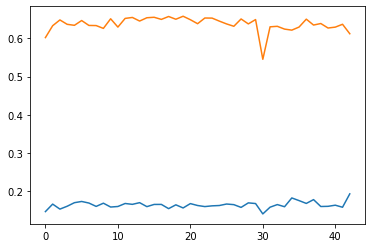

In [25]:
# occhio a unnare questa che ci mette 50 anni, il prof dice che è ok
df_iter = pd.read_csv('log_tcp_complete.xz', sep=" ", iterator=True, chunksize=100000)

rates_HTTP = []
rates_HTTPS = []
for chunk in df_iter:
    rates_HTTP.append(chunk[(chunk['con_t:42'] == 1)].shape[0]/chunk.shape[0])
    rates_HTTPS.append(chunk[(chunk['con_t:42'] == 8192)].shape[0]/chunk.shape[0])

plt.plot(rates_HTTP)
plt.plot(rates_HTTPS)
plt.show()

# Task 2

<AxesSubplot:xlabel='hostname'>

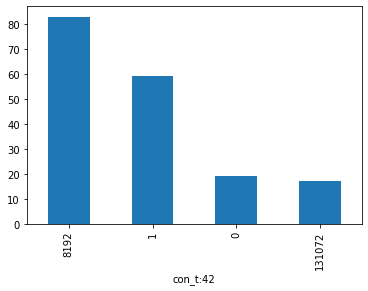

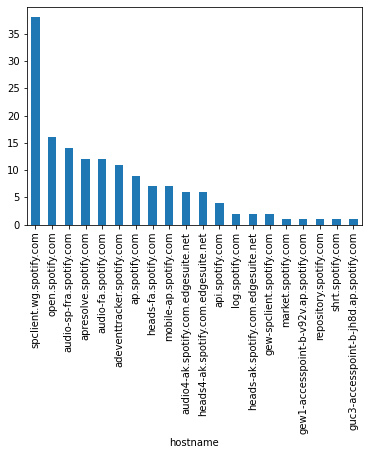

In [31]:
def find_spotify(row):
    string = 'spotify'
    if string in row['http_hostname:131']:
        return row['http_hostname:131']
    elif string in row['fqdn:127']:
        return row['fqdn:127']
    elif string in row['c_tls_SNI:116']:
        return row['c_tls_SNI:116']
    else :
        return row['s_tls_SCN:117']
    
# Filter DataFrame for "/*facebook*"
sp_string = '/*spotify*'
sp_dataf = dataf[ (dataf['http_hostname:131'].str.contains(sp_string)) |
                  (dataf['fqdn:127'].str.contains(sp_string)) |
                  (dataf['c_tls_SNI:116'].str.contains(sp_string)) |
                  (dataf['s_tls_SCN:117'].str.contains(sp_string))
                ]

# print(fb_dataf)

new_col = sp_dataf.apply(find_spotify, axis=1)
# new_col
sp_dataf.insert(len(sp_dataf.columns),'hostname',new_col) 

# Group and plot

# group and plot by connection type
sp_dataf.groupby(['con_t:42']).size().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:xlabel='hostname'>

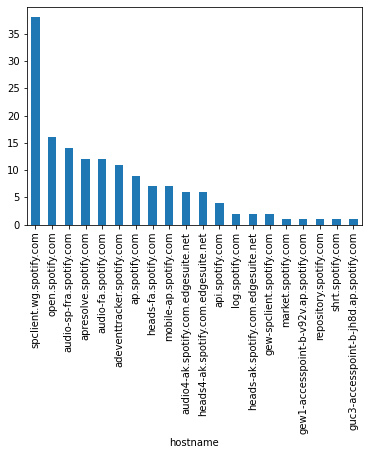

In [33]:
# group and plot by hostname
plt.figure()
sp_hostname_df = sp_dataf.groupby(['hostname']).size().sort_values(ascending=False)
sp_hostname_df.head(20).plot(kind='bar')

<AxesSubplot:xlabel='s_ip:15'>

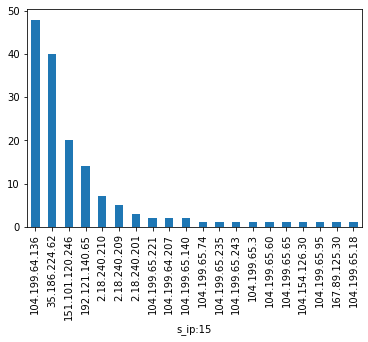

In [32]:
# group and plot by IP 
plt.figure()
sp_dataf.groupby(['s_ip:15']).size().sort_values(ascending=False).head(20).plot(kind='bar')

In [36]:
# group and plot by hostname
plt.figure()
sp_hostname_df.groupby(['s_ip:15']).size().sort_values(ascending=False).plot(kind='bar')

KeyError: 's_ip:15'

<Figure size 432x288 with 0 Axes>